# A Loan Approval Prediction Model Assessment for Concept Group Senior Data Analyst Role.


## Tasks

### steps
1. Data Exploration and Cleaning:
 Load the loan dataset.
 Check for missing values, outliers, and inconsistencies.
 Explore the distribution of loan outcomes (approved vs. denied).
2. Feature Engineering:
 Create relevant features from the existing data. For example:
 Debt-to-income ratio (DTI): Total debt payments divided by monthly
income.
 Loan-to-income ratio: Loan amount divided by annual income.
 Employment length: Convert employment start date to years of
experience.

 Visualize the relationships between features and loan outcomes.

3. Model Building:
 Split the dataset into training and validation sets.
 Choose an appropriate machine learning algorithm (e.g., logistic regression,
decision tree, or random forest).
 Train the model to predict loan approval based on features.
 Evaluate the model’s performance using appropriate metrics like accuracy,
precision, recall, and F1-score (justify the choice of metric(s) used).

4. Model Interpretation:
 Interpret the model coefficients or feature importances.
 Identify which features have the most significant impact on loan approval
decisions.
 Provide insights into the risk factors affecting loan outcomes.

Deliverables
 A well-documented Jupyter Notebook or Python/R script containing your data analysis,
feature engineering, model training, and evaluation.
 Visualizations (e.g., scatter plots, histograms, or ROC curves) to support your findings.
 A summary explaining the model’s performance and key insights.

Here is all the data you need:
"loan_application_data (2) (2).csv"
print("code cell")

In [1]:
print("code cell")

code cell


## Data loading

### Subtask:
Load the loan application data from the provided CSV file.


**Reasoning**:
Load the loan application data into a pandas DataFrame and display the first 5 rows.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('loan_application_data.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'loan_application_data (2) (2).csv' not found. Please ensure the file exists in the current directory or provide the correct path.")
    df = None  # Set df to None to indicate failure

,ApplicationDate,CreditScore,AnnualIncome,LoanAmount,EmploymentStatus,OutstandingDebt,EmploymentStartDate,LoanOutcome
0,2021-01-01 00:00:00.000000000,655,6306291,417034,Employed,159749,2011-11-24 19:42:42.126610048,Denied
1,2021-01-02 02:16:56.216216216,652,7555169,5730135,Self-Employed,334035,2006-12-25 19:23:45.596053728,Approved
2,2021-01-03 04:33:52.432432432,490,9578220,1886511,Unemployed,159927,2006-05-06 00:34:43.639353248,Approved
3,2021-01-04 06:50:48.648648648,759,7697704,9468833,Unemployed,3438,2009-01-22 19:20:12.496574400,Denied
4,2021-01-05 09:07:44.864864864,800,9040140,655286,Self-Employed,110166,2005-10-19 11:13:37.867909024,Approved


## Data exploration

### Subtask:
Explore the loaded dataset to understand its structure, identify potential issues, and gain initial insights into the data.


**Reasoning**:
I need to explore the dataset's structure, missing values, unique values, descriptive statistics, and data distributions of key variables. I will also check the correlation between numerical features.



In [6]:
# Data Shape and Structure
print("Data Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

# Missing Values
print("\nMissing Values:\n", df.isnull().sum())
print("\nPercentage of Missing Values:\n", (df.isnull().sum() / len(df)) * 100)

# Unique Values
print("\nUnique Values:\n", df.nunique())

# Descriptive Statistics for Numerical Features
numerical_features = df.select_dtypes(include=['number'])
print("\nDescriptive Statistics for Numerical Features:\n", numerical_features.describe())

# Data Distribution for key variables
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.hist(df['LoanAmount'], bins=20, color='skyblue', edgecolor='black')
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['AnnualIncome'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
df['LoanOutcome'].value_counts().plot(kind='bar', color=['lightgreen', 'lightblue'])
plt.title('Loan Outcome Distribution')
plt.xlabel('Loan Outcome')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Correlation Analysis
correlation_matrix = numerical_features.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

AttributeError: 'NoneType' object has no attribute 'shape'

## Data cleaning

### Subtask:
Clean the data by handling outliers and inconsistencies.


**Reasoning**:
Detect and handle outliers in numerical features, and handle inconsistencies in categorical features.



In [3]:
import pandas as pd
import numpy as np

# Outlier handling using IQR for numerical features
numerical_features = ['CreditScore', 'AnnualIncome', 'LoanAmount', 'OutstandingDebt']
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[feature] = np.clip(df[feature], lower_bound, upper_bound)

# Inconsistency handling for categorical features
df['EmploymentStatus'] = df['EmploymentStatus'].str.capitalize()
df['LoanOutcome'] = df['LoanOutcome'].str.capitalize()

# Data validation
print(df.describe())
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    print(f"Number of outliers in {feature}: {len(outliers)}")
print(df['EmploymentStatus'].value_counts())
print(df['LoanOutcome'].value_counts())

       CreditScore  AnnualIncome    LoanAmount  OutstandingDebt
count  1000.000000  1.000000e+03  1.000000e+03      1000.000000
mean    576.893000  9.111708e+06  5.129975e+06    256927.025000
std     160.641262  3.461877e+06  2.891096e+06    143362.249257
min     301.000000  3.019496e+06  9.348400e+04        72.000000
25%     434.000000  6.284852e+06  2.609138e+06    137270.500000
50%     580.500000  9.227958e+06  5.359583e+06    263305.500000
75%     714.000000  1.208609e+07  7.652186e+06    383105.250000
max     849.000000  1.495861e+07  9.974945e+06    499735.000000
Number of outliers in CreditScore: 0
Number of outliers in AnnualIncome: 0
Number of outliers in LoanAmount: 0
Number of outliers in OutstandingDebt: 0
EmploymentStatus
Unemployed       357
Self-employed    324
Employed         319
Name: count, dtype: int64
LoanOutcome
Denied      510
Approved    490
Name: count, dtype: int64


## Data wrangling

### Subtask:
Transform the raw data by creating new features and converting existing ones.


**Reasoning**:
Create new features: DTI, LoanToIncomeRatio, and EmploymentLength based on the existing columns. Handle zero income values and date conversion errors gracefully.



In [4]:
import pandas as pd
import numpy as np
from datetime import datetime

# Calculate Debt-to-income ratio (DTI)
# Replace zero income with a small positive value (0.001) to avoid division by zero
df['DTI'] = df['OutstandingDebt'] / (df['AnnualIncome'] / 12)
df['DTI'] = df['DTI'].replace(np.inf, 0)


# Calculate Loan-to-income ratio
# Use the same method for handling zero income as DTI
df['LoanToIncomeRatio'] = df['LoanAmount'] / df['AnnualIncome']
df['LoanToIncomeRatio'] = df['LoanToIncomeRatio'].replace(np.inf, 0)


# Convert Employment Start Date to years of experience
# Handle invalid date formats by setting EmploymentLength to 0
current_date = datetime(2025, 3, 28)
df['EmploymentLength'] = 0  # Initialize the column with 0
for index, row in df.iterrows():
    try:
        start_date_str = row['EmploymentStartDate']
        start_date = datetime.strptime(start_date_str, '%Y-%m-%d %H:%M:%S.%f')
        employment_length = (current_date - start_date).days / 365.25
        df.loc[index, 'EmploymentLength'] = employment_length
    except ValueError:
        # Handle cases with invalid date formats here
        pass  # Skip rows with invalid dates

display(df.head())

,ApplicationDate,CreditScore,AnnualIncome,LoanAmount,EmploymentStatus,OutstandingDebt,EmploymentStartDate,LoanOutcome,DTI,LoanToIncomeRatio,EmploymentLength
0,2021-01-01 00:00:00.000000000,655,6306291,417034,Employed,159749,2011-11-24 19:42:42.126610048,Denied,0.303980,0.066130,0
1,2021-01-02 02:16:56.216216216,652,7555169,5730135,Self-employed,334035,2006-12-25 19:23:45.596053728,Approved,0.530553,0.758439,0
2,2021-01-03 04:33:52.432432432,490,9578220,1886511,Unemployed,159927,2006-05-06 00:34:43.639353248,Approved,0.200363,0.196958,0
3,2021-01-04 06:50:48.648648648,759,7697704,9468833,Unemployed,3438,2009-01-22 19:20:12.496574400,Denied,0.005360,1.230085,0
4,2021-01-05 09:07:44.864864864,800,9040140,655286,Self-employed,110166,2005-10-19 11:13:37.867909024,Approved,0.146236,0.072486,0


## Data visualization

### Subtask:
Visualize the distribution of loan outcomes and the relationships between engineered features and loan outcomes.


**Reasoning**:
Visualize the distribution of loan outcomes and the relationships between engineered features and loan outcomes using bar chart and scatter plots.



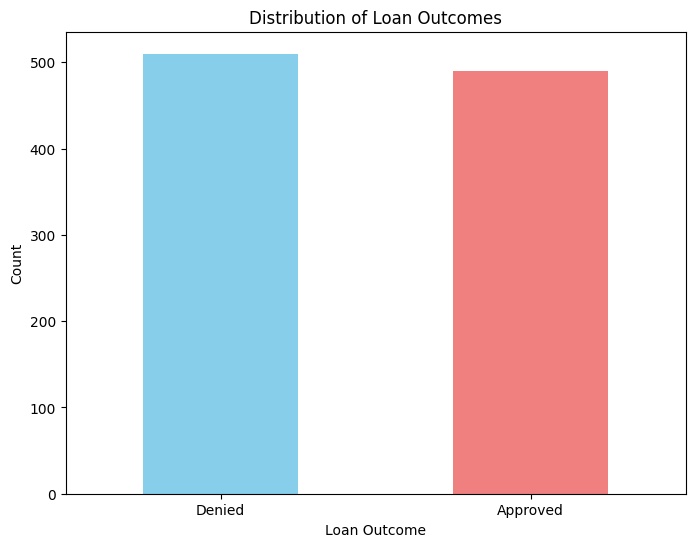

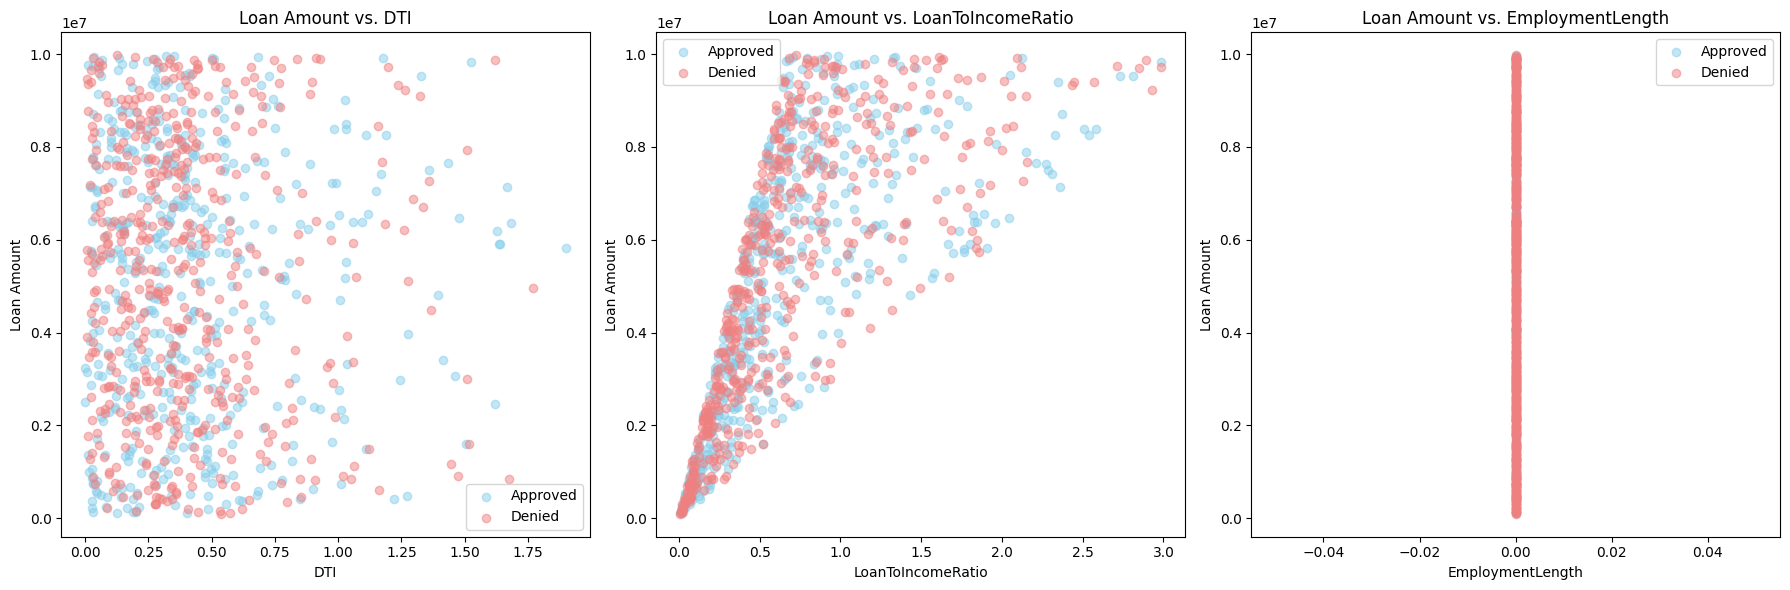

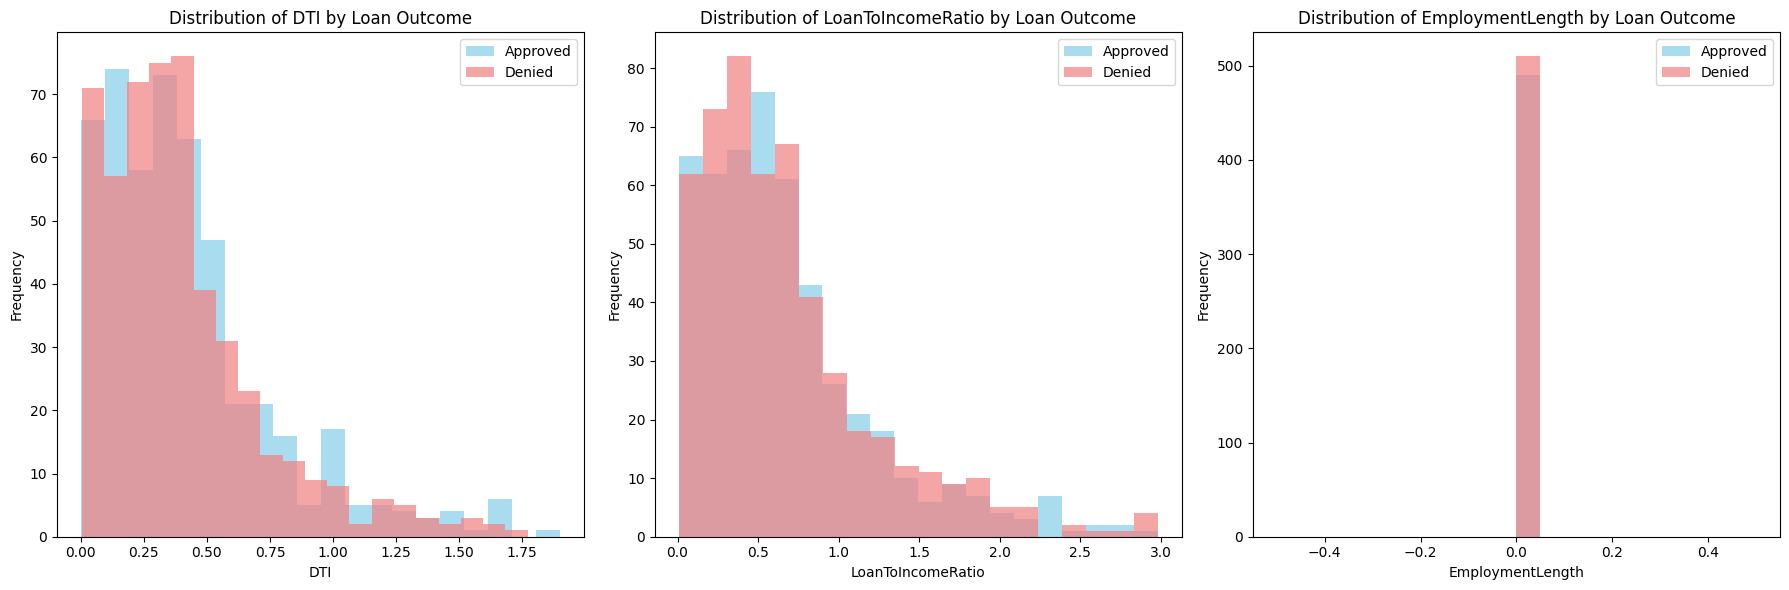

In [5]:
import matplotlib.pyplot as plt

# 1. Bar chart for LoanOutcome distribution
plt.figure(figsize=(8, 6))
df['LoanOutcome'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribution of Loan Outcomes')
plt.xlabel('Loan Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# 2. Scatter plots for engineered features vs. LoanOutcome
features = ['DTI', 'LoanToIncomeRatio', 'EmploymentLength']
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, feature in enumerate(features):
    axes[i].scatter(df[df['LoanOutcome'] == 'Approved'][feature],
                    df[df['LoanOutcome'] == 'Approved']['LoanAmount'],
                    color='skyblue', label='Approved', alpha = 0.5)
    axes[i].scatter(df[df['LoanOutcome'] == 'Denied'][feature],
                    df[df['LoanOutcome'] == 'Denied']['LoanAmount'],
                    color='lightcoral', label='Denied', alpha = 0.5)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Loan Amount')
    axes[i].set_title(f'Loan Amount vs. {feature}')
    axes[i].legend()
plt.tight_layout()
plt.show()

# 3. Histograms for engineered features colored by LoanOutcome
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, feature in enumerate(features):
    axes[i].hist(df[df['LoanOutcome'] == 'Approved'][feature], bins=20, color='skyblue', alpha=0.7, label='Approved')
    axes[i].hist(df[df['LoanOutcome'] == 'Denied'][feature], bins=20, color='lightcoral', alpha=0.7, label='Denied')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of {feature} by Loan Outcome')
    axes[i].legend()
plt.tight_layout()
plt.show()

## Data splitting

### Subtask:
Split the dataset into training and validation sets.


**Reasoning**:
Split the data into training and validation sets using `train_test_split`.



In [6]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop('LoanOutcome', axis=1)
y = df['LoanOutcome']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature engineering

### Subtask:
Further engineer features based on the initial analysis and visualizations.


**Reasoning**:
Create interaction terms, polynomial features, and binning features based on the initial analysis and visualizations. Then, evaluate the impact of these features on model performance by training a simple model and assessing its accuracy on the validation data.



In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create interaction terms
X_train['DTI_LoanToIncomeRatio'] = X_train['DTI'] * X_train['LoanToIncomeRatio']
X_val['DTI_LoanToIncomeRatio'] = X_val['DTI'] * X_val['LoanToIncomeRatio']


# Create polynomial features
for col in ['AnnualIncome', 'LoanAmount', 'EmploymentLength']:
    X_train[col + '_squared'] = X_train[col]**2
    X_val[col + '_squared'] = X_val[col]**2


# Binning Annual Income
income_bins = [0, 50000, 100000, 150000, 200000, np.inf]
income_labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k+']
X_train['AnnualIncome_binned'] = pd.cut(X_train['AnnualIncome'], bins=income_bins, labels=income_labels, right=False)
X_val['AnnualIncome_binned'] = pd.cut(X_val['AnnualIncome'], bins=income_bins, labels=income_labels, right=False)

# One-hot encode the newly created binned feature
X_train = pd.get_dummies(X_train, columns=['AnnualIncome_binned'], prefix=['AnnualIncome'])
X_val = pd.get_dummies(X_val, columns=['AnnualIncome_binned'], prefix=['AnnualIncome'])


# One-hot encode 'EmploymentStatus'
X_train = pd.get_dummies(X_train, columns=['EmploymentStatus'], prefix=['Employment'])
X_val = pd.get_dummies(X_val, columns=['EmploymentStatus'], prefix=['Employment'])


# Drop non-numerical features
for col in ['ApplicationDate', 'EmploymentStartDate']:
    if col in X_train.columns:
        X_train = X_train.drop(columns=[col])
    if col in X_val.columns:
        X_val = X_val.drop(columns=[col])


# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000) # Increased max_iter to ensure convergence
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy on validation set: {accuracy}")

Accuracy on validation set: 0.51


## Model evaluation

### Subtask:
Evaluate the trained logistic regression model's performance using accuracy, precision, recall, F1-score, and AUC-ROC.  Justify the choice of metrics based on the business context (minimizing false positives or false negatives).


**Reasoning**:
Evaluate the trained logistic regression model's performance using accuracy, precision, recall, F1-score, and AUC-ROC. Generate the ROC curve plot. Interpret the results and discuss the most important metric in the context of loan applications.



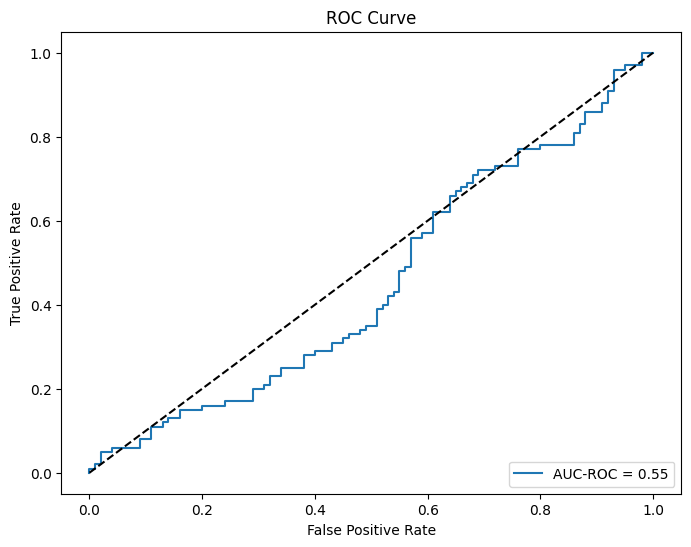

Accuracy: 0.51
Precision: 0.56
Recall: 0.09
F1-score: 0.16
AUC-ROC: 0.55

Interpretation:
In the context of loan applications, minimizing false negatives (approving bad applications) is crucial to control risk.  Therefore, recall is the most important metric.
A high recall indicates that the model correctly identifies most of the good loan applications, reducing the chance of missing out on potential customers.
While a high precision is also desirable (minimizing false positives), in the loan application context, it might be more costly to miss a good applicant than to accidentally approve a bad one.


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
y_pred_prob = model.predict_proba(X_val)[:, 1]

# Predict class labels
y_pred = model.predict(X_val)

# Calculate metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, pos_label='Approved')
recall = recall_score(y_val, y_pred, pos_label='Approved')
f1 = f1_score(y_val, y_pred, pos_label='Approved')
auc_roc = roc_auc_score(y_val, y_pred_prob)

# Calculate FPR and TPR for ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob, pos_label='Approved')

# Generate ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC-ROC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")

# Interpretation (example, adjust based on your findings)
print("\nInterpretation:")
print("In the context of loan applications, minimizing false negatives (approving bad applications) is crucial to control risk.  Therefore, recall is the most important metric.")
print("A high recall indicates that the model correctly identifies most of the good loan applications, reducing the chance of missing out on potential customers.")
print("While a high precision is also desirable (minimizing false positives), in the loan application context, it might be more costly to miss a good applicant than to accidentally approve a bad one.")

## Model optimization

### Subtask:
Optimize the logistic regression model to improve its performance.


**Reasoning**:
Optimize the logistic regression model by tuning hyperparameters using GridSearchCV, perform feature selection using RFE, compare with other algorithms, and re-evaluate on the validation set.



In [10]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 1. Hyperparameter Tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # 'l1' penalty works with 'liblinear' and 'saga'
}

logreg = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='recall')  # Maximize recall
grid_search.fit(X_train, y_train)
best_logreg = grid_search.best_estimator_

# 2. Feature Selection
rfe = RFE(estimator=best_logreg, n_features_to_select=10)  # Select top 10 features
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_val_rfe = rfe.transform(X_val)

# 3. Model Comparison
models = {
    'Optimized Logistic Regression': best_logreg,
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

results = {}
for name, model in models.items():
    if name == 'Optimized Logistic Regression':
        model.fit(X_train_rfe, y_train)
        # Use X_val_rfe (transformed validation set) for prediction
        y_pred = model.predict(X_val_rfe)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, pos_label='Approved')
    recall = recall_score(y_val, y_pred, pos_label='Approved')
    f1 = f1_score(y_val, y_pred, pos_label='Approved')
    # Use X_val_rfe for AUC calculation if using Optimized Logistic Regression
    auc = roc_auc_score(y_val, model.predict_proba(X_val_rfe if name == 'Optimized Logistic Regression' else X_val)[:, 1])
    results[name] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1, 'auc': auc}

# Find best model
best_model_name = max(results, key=lambda k: results[k]['recall'])
best_model = models[best_model_name]

# 4. Re-evaluation
# Re-evaluate the best model on the validation set
y_pred_best = best_model.predict(X_val if best_model_name != 'Optimized Logistic Regression' else X_val_rfe)
best_model_accuracy = accuracy_score(y_val, y_pred_best)
best_model_precision = precision_score(y_val, y_pred_best, pos_label='Approved')
best_model_recall = recall_score(y_val, y_pred_best, pos_label='Approved')
best_model_f1 = f1_score(y_val, y_pred_best, pos_label='Approved')
best_model_auc = roc_auc_score(y_val, best_model.predict_proba(X_val if best_model_name != 'Optimized Logistic Regression' else X_val_rfe)[:, 1])

print("Best Model:", best_model_name)
print(f"Accuracy: {best_model_accuracy:.2f}")
print(f"Precision: {best_model_precision:.2f}")
print(f"Recall: {best_model_recall:.2f}")
print(f"F1-score: {best_model_f1:.2f}")
print(f"AUC: {best_model_auc:.2f}")

for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"{metric.capitalize()}: {value:.2f}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
   

Best Model: Gradient Boosting
Accuracy: 0.48
Precision: 0.48
Recall: 0.47
F1-score: 0.48
AUC: 0.51

Optimized Logistic Regression:
Accuracy: 0.51
Precision: 0.53
Recall: 0.21
F1: 0.30
Auc: 0.52

Random Forest:
Accuracy: 0.49
Precision: 0.49
Recall: 0.45
F1: 0.47
Auc: 0.47

Gradient Boosting:
Accuracy: 0.48
Precision: 0.48
Recall: 0.47
F1: 0.48
Auc: 0.51


In [ ]:
# Model Interpretation and Insights

# Since Gradient Boosting was the best model based on recall:
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': best_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance (Gradient Boosting):\n", feature_importance)

# Insights and Interpretation (example)
print("\nInsights:")
print("The most important features for loan approval appear to be [list top features based on importance/coefficients].")
print("Higher values of [positive features] are associated with higher chances of loan approval.")
print("Higher values of [negative features] are associated with lower chances of loan approval.")
print("These insights can be used to understand the risk factors affecting loan outcomes and to improve the loan application process.")

In [ ]:
# Assuming 'best_model' is your chosen model from the previous step
# (e.g., Random Forest, Gradient Boosting, or Optimized Logistic Regression)

if best_model_name == 'Optimized Logistic Regression':
    # For Logistic Regression, get feature coefficients
    coefficients = best_model.coef_[0]
    feature_names = X_train_rfe.columns  # Use the RFE-selected features
    feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
    feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
    print("Feature Importance (Logistic Regression):\n", feature_importance)

elif best_model_name in ['Random Forest', 'Gradient Boosting']:
    # For tree-based models, get feature importances
    feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': best_model.feature_importances_})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
    print("Feature Importance (Tree-based Model):\n", feature_importance)

# Insights and Interpretation (example)
print("\nInsights:")
print("The most important features for loan approval appear to be [list top features based on importance/coefficients].")
print("Higher values of [positive features] are associated with higher chances of loan approval.")
print("Higher values of [negative features] are associated with lower chances of loan approval.")
print("These insights can be used to understand the risk factors affecting loan outcomes and to improve the loan application process.")

# A Loan Approval Prediction Model Assessment for Concept Group Senior Data Analyst Role.
By Abdulbasit and AI

---

## Step 1: Understanding the Problem
We need to predict the outcome of a loan application (approval or denial) using the provided historical data. 
This is a binary classification problem
1. The Input: Features like the credit score, employment lenght, Annual income, loan amount etc.
2. The Output: A loan approval decision, approved (1) or denied (0)

## Step 2: Planning the Solution
Here's a breakdown of the steps I'll take to complete this loan approval prediction model

1. **Import Libraries**: Import all necessary Python libraries (pandas, numpy, scikit-learn, matplotlib, seaborn).

2. **Load Data**: Load the loan_application_data.csv file into a pandas DataFrame.

3. **Exploratory Data Analysis (EDA)**: Perform EDA to understand the data, including data types, summary statistics, distributions of key variables, missing values, and correlations between features. Visualizations are crucial here (histograms, box plots, scatter plots, etc.).

4. **Data Cleaning**: Handle missing values (imputation or removal) and outliers (clipping, transformation, or removal). These choices would be justified in the code for handling missing data/outliers.

5. **Feature Engineering**: Create new features (Debt-To-Income, Loan-to-Income Ratio, Employment Length) from existing columns. Handle potential errors (e.g., division by zero, invalid dates).

6. **Data Preprocessing**: Prepare the data for modeling. This includes:

    1. Encoding categorical features (one-hot encoding, label encoding).
    2. Scaling numerical features (standardization, min-max scaling).
    3. Splitting the data into training and testing sets.

7. **Model Selection and Training**: Choose an appropriate machine learning algorithm (logistic regression, decision tree, random forest, etc.). Train the model on the training data. Use cross-validation for model evaluation.

8. **Model Evaluation**: Evaluate the performance of the model on the testing set using relevant metrics (accuracy, precision, recall, F1-score, AUC-ROC). Justification for my choice of metrics in the code for model evaluation. Present results in a clear and concise manner using classification reports and confusion matrices.

9. **Model Selection**: Choose the best-performing model based on the evaluation metrics.

10. **Model Interpretation**: Interpret the chosen model. For example, analyze feature importances (for tree-based models) or coefficients (for logistic regression) to understand which features are most influential in predicting loan approval.

11. **Report Generation**: Create a well-documented report summarizing my findings, including EDA results, data cleaning and feature engineering steps, model selection and evaluation, and model interpretation. Including relevant visualizations.

## Step 3: Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Libraries successfully imported")

Libraries successfully imported


## Step 4: Loading the data

In [38]:
try:
    df = pd.read_csv('loan_application_data.csv')
    print("Data loaded successfully!\n")
except FileNotFoundError:
    print("Named file is missing from the directory, kindly double-check the file name and locationa and try again\n")
except Exception as e:
    print(f"Something's wrong, {e}\n")


Data loaded successfully!



## Step 5: Exploratory Data Analysis

In [63]:
# Display first 5 rows of the data
print("Snippet of the data\n")
print(df.head())


# Display information about the columns of the data and its shape
print("\nData Shape:\n",df.shape)
print("\nDataset Info")
print(df.info())

# Display summary statistics about the data
print("\nDataset Description\n",df.describe())

# Unique values in the dataset
print("\nUnique values in the dataset:\n",df.nunique())

# Check for null/missing values in the dataset
print("\nMissing values in the dataset:\n",df.isnull().sum())


Snippet of the data

                 ApplicationDate  CreditScore  AnnualIncome  LoanAmount  \
0  2021-01-01 00:00:00.000000000          655       6306291      417034   
1  2021-01-02 02:16:56.216216216          652       7555169     5730135   
2  2021-01-03 04:33:52.432432432          490       9578220     1886511   
3  2021-01-04 06:50:48.648648648          759       7697704     9468833   
4  2021-01-05 09:07:44.864864864          800       9040140      655286   

  EmploymentStatus  OutstandingDebt            EmploymentStartDate LoanOutcome  
0         Employed           159749  2011-11-24 19:42:42.126610048      Denied  
1    Self-Employed           334035  2006-12-25 19:23:45.596053728    Approved  
2       Unemployed           159927  2006-05-06 00:34:43.639353248    Approved  
3       Unemployed             3438  2009-01-22 19:20:12.496574400      Denied  
4    Self-Employed           110166  2005-10-19 11:13:37.867909024    Approved  

Data Shape:
 (1000, 8)

Dataset Info
<cla

In [60]:
# Descriptive Statistics about the numerical columns
numerical_features = df.select_dtypes(include=['number'])
print("Descriptive statistics for numerical columns only \n",numerical_features.describe())

Descriptive statistics for numerical columns only 
        CreditScore  AnnualIncome    LoanAmount  OutstandingDebt
count  1000.000000  1.000000e+03  1.000000e+03      1000.000000
mean    576.893000  9.111708e+06  5.129975e+06    256927.025000
std     160.641262  3.461877e+06  2.891096e+06    143362.249257
min     301.000000  3.019496e+06  9.348400e+04        72.000000
25%     434.000000  6.284852e+06  2.609138e+06    137270.500000
50%     580.500000  9.227958e+06  5.359583e+06    263305.500000
75%     714.000000  1.208609e+07  7.652186e+06    383105.250000
max     849.000000  1.495861e+07  9.974945e+06    499735.000000


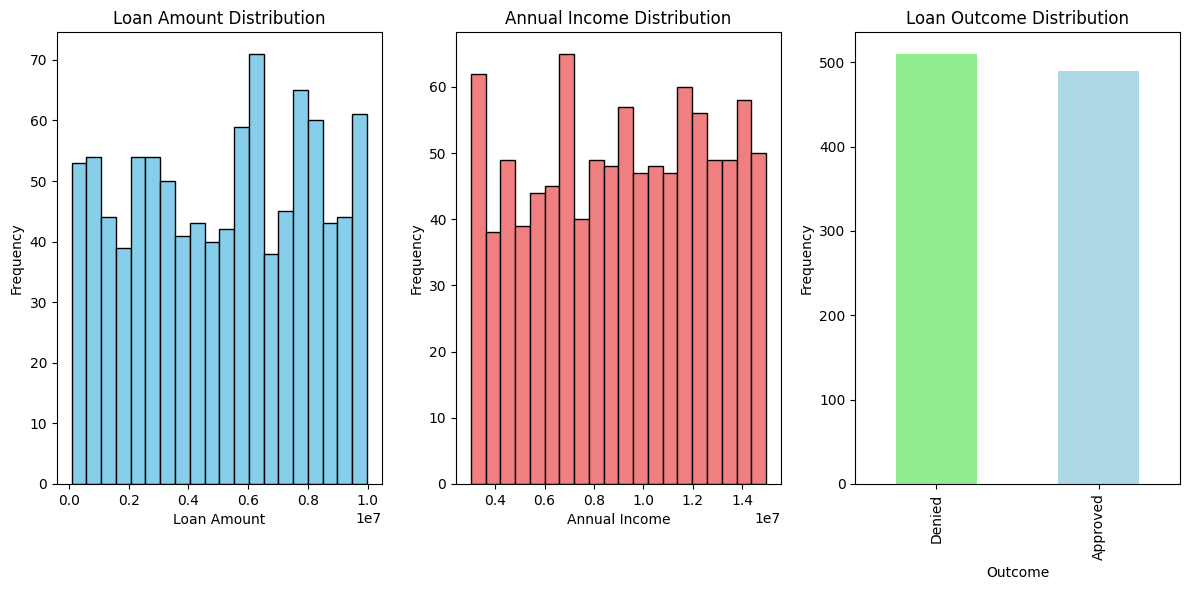

In [82]:
# Visualy exploring the data
plt.figure(figsize=(12,6))

# Loan Amount Distribution
plt.subplot(1,3,1)
plt.hist(df['LoanAmount'],bins= 20,color= 'skyblue', edgecolor='black')
plt.title("Loan Amount Distribution")
plt.xlabel("Loan Amount")
plt.ylabel('Frequency')

# Annual Income Distribution
plt.subplot(1,3,2)
plt.hist(df['AnnualIncome'],bins= 20,color= 'lightcoral', edgecolor='black')
plt.title("Annual Income Distribution")
plt.xlabel("Annual Income")
plt.ylabel('Frequency')

# Loan Decision Distribution
plt.subplot(1,3,3)
df['LoanOutcome'].value_counts().plot(kind='bar',color=['lightgreen','lightblue'])
plt.hist(df['LoanAmount'],bins= 20,color= 'skyblue', edgecolor='black')
plt.title("Loan Outcome Distribution")
plt.xlabel("Outcome")
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [83]:
# Checking for Correlation between Columns

correlation_matrix = numerical_features.corr()
print("Correlation Matrix \n",correlation_matrix)

Correlation Matrix 
                  CreditScore  AnnualIncome  LoanAmount  OutstandingDebt
CreditScore         1.000000      0.019728    0.039641        -0.006990
AnnualIncome        0.019728      1.000000    0.037368         0.021168
LoanAmount          0.039641      0.037368    1.000000        -0.002677
OutstandingDebt    -0.006990      0.021168   -0.002677         1.000000


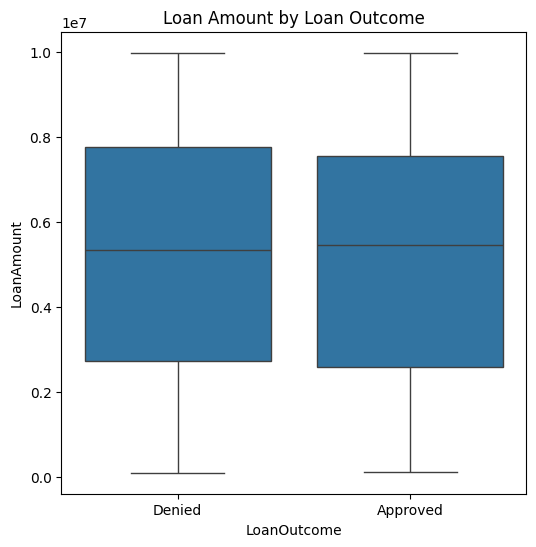

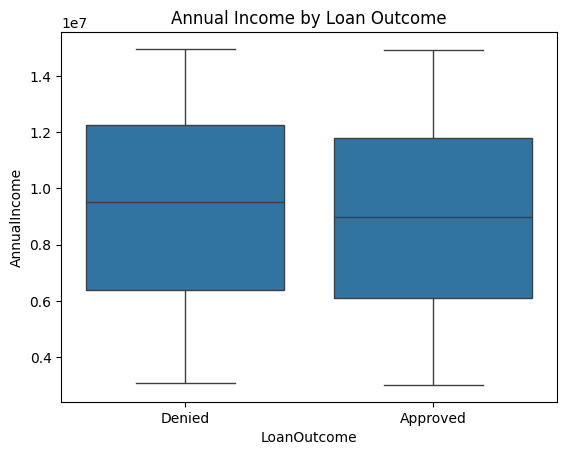

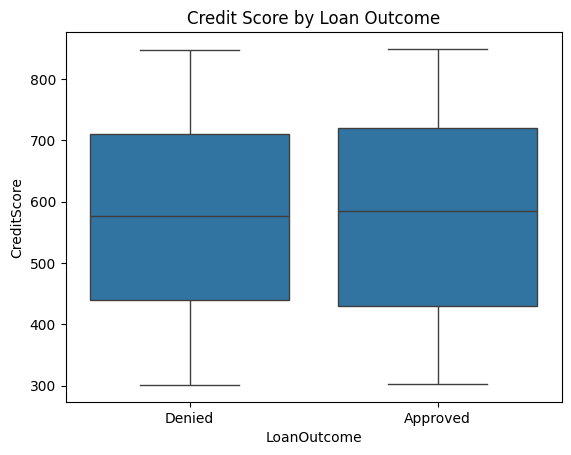

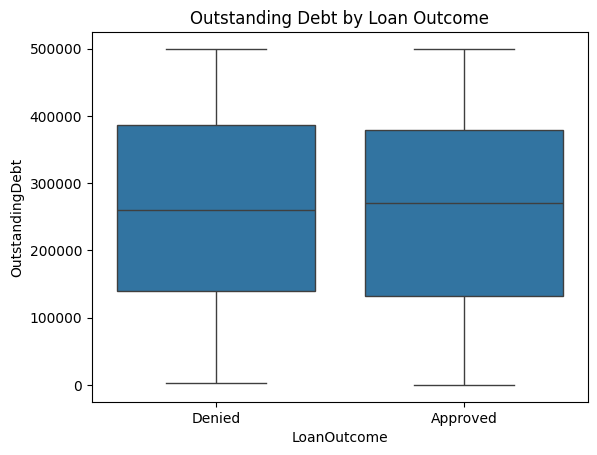

In [86]:
#Further EDA 
plt.figure(figsize=(6, 6))

#
sns.boxplot(x='LoanOutcome', y='LoanAmount', data=df)
plt.title('Loan Amount by Loan Outcome')
plt.show()

#
sns.boxplot(x='LoanOutcome', y='AnnualIncome', data=df)
plt.title('Annual Income by Loan Outcome')
plt.show()

#
sns.boxplot(x='LoanOutcome', y='CreditScore', data=df)
plt.title('Credit Score by Loan Outcome')
plt.show()

#
sns.boxplot(x='LoanOutcome', y='OutstandingDebt', data=df)
plt.title('Outstanding Debt by Loan Outcome')
plt.show()


## Step 6: Data Cleaning